In [73]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Clase: Representación de señales en tiempo y frecuencia usando transformada de Fourier y transformada inversa de Fourier</h1>
<h3 style="text-align:center">ACUS099: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales">https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import scipy.io.wavfile as wavfile
import scipy

import scipy.fftpack
from scipy.signal import convolve
from scipy.fft import fft, ifft, fftfreq

from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import EngFormatter

import pyaudio
import wave

import IPython.display as ipd

In [2]:
def TF(x, T, N):
    X = fft(x)
    Xf = fftfreq(N, T)[:N//2]
    return (X, Xf)

In [11]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
t = np.linspace(0.0, N*T, N, endpoint=False)

f1 = 15.0
f2 = 45.
f3 = 75.
f4 = 105.

A1 = 1
A2 = 1./(3.)
A3 = 1./(5.)
A4 = 1./(7.)

x1 = A1*np.sin(f1 * 2.0*np.pi*t)
x2 = A2*np.sin(f2 * 2.0*np.pi*t)
x3 = A3*np.sin(f3 * 2.0*np.pi*t)
x4 = A4*np.sin(f4 * 2.0*np.pi*t)

s = x1 + x2 + x3 + x4

(X, Xf) = TF(s, T, N)



<IPython.core.display.Javascript object>


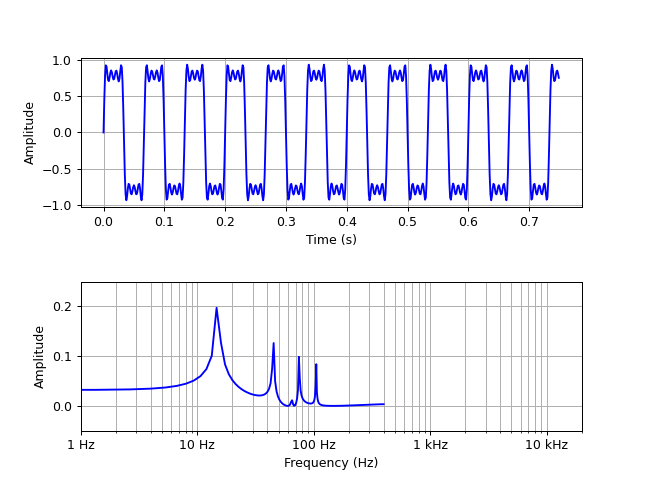

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.5)

#figura 1, ax1
ax1.plot(t, s, "b") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()


#figura 2, ax2
ax2.plot(Xf, 2.0/N * 10*np.log10(np.abs(X[0:N//2]))**2, "b") # plotting the positive fft spectrum
ax2.set_xscale('log')
#ax2.axis([1, 20000, -0.05, 1.25])
ax2.axis([1, 20000, -0.05, 0.25])
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.grid(True, which="both", ls="-")
# Se define para valores en Hz inmediatamente con este formato predefinido
ax2.xaxis.set_major_formatter(EngFormatter(unit='Hz')) 

In [23]:
idx =1.0/12.0
st = (2)**idx

la4 = 440
sol4 = la4/((st)**2)
fa4 = la4/((st)**4)
mi4 = la4/((st)**5)
re4 = la4/((st)**7)
do4 = la4/((st)**9)
si3 = la4/((st)**10)
la3 = la4/((st)**12)
print(la3)

219.99999999999991


In [30]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 8000.0
t = np.linspace(0.0, N*T, N, endpoint=False)

A1 = 1.0
A2 = 1.0
A3 = 1.0
A4 = 1.0
A5 = 1.0
A6 = 1.0
A7 = 1.0
A8 = 1.0

x1 = A1*np.sin(la4 * 2.0*np.pi*t)
x2 = A2*np.sin(sol4 * 2.0*np.pi*t)
x3 = A3*np.sin(fa4 * 2.0*np.pi*t)
x4 = A4*np.sin(mi4 * 2.0*np.pi*t)
x5 = A5*np.sin(re4 * 2.0*np.pi*t)
x6 = A6*np.sin(do4 * 2.0*np.pi*t)
x7 = A7*np.sin(si3 * 2.0*np.pi*t)
x8 = A8*np.sin(la3 * 2.0*np.pi*t)

s = x2 + x4 + x6 

(X, Xf) = TF(s, T, N)


<IPython.core.display.Javascript object>


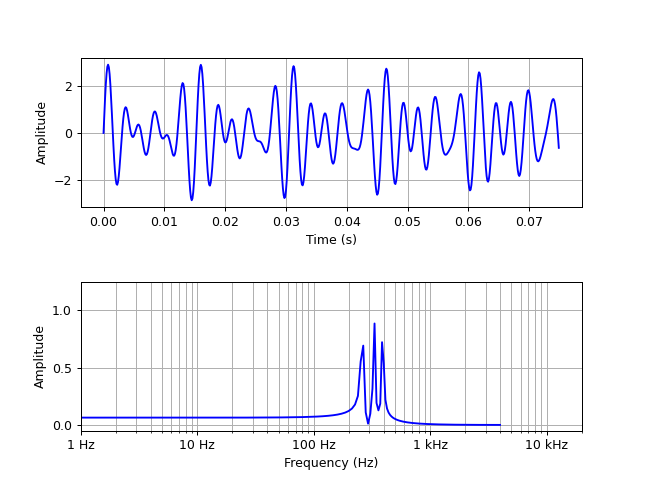

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.5)

#figura 1, ax1
ax1.plot(t, s, "b") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()


#figura 2, ax2
ax2.plot(Xf, 2.0/N * np.abs(X[0:N//2]), "b") # plotting the positive fft spectrum
ax2.set_xscale('log')
ax2.axis([1, 20000, -0.05, 1.25])
#ax2.axis([1, 20000, -0.05, 0.25])
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.grid(True, which="both", ls="-")
# Se define para valores en Hz inmediatamente con este formato predefinido
ax2.xaxis.set_major_formatter(EngFormatter(unit='Hz')) 

In [52]:
chunk                  = 1024
formato                = pyaudio.paInt16
canales                = 1
tasa_sampleo           = 44100
segundos_grabados      = 5
nombre_archivo_salida  = "uuuu.wav"

p = pyaudio.PyAudio()

stream = p.open(format=formato,
                channels=canales,
                rate=tasa_sampleo,
                input=True,
                frames_per_buffer=chunk)

print("* grabando")

frames = []

for i in range(0, int(tasa_sampleo / chunk * segundos_grabados)):
    data = stream.read(chunk)
    frames.append(data)

print("* lista la grabación")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(nombre_archivo_salida, 'wb')
wf.setnchannels(canales)
wf.setsampwidth(p.get_sample_size(formato))
wf.setframerate(tasa_sampleo)
wf.writeframes(b''.join(frames))
wf.close()

* grabando
* lista la grabación


In [34]:
def TF2(s, fs):
    N = s.shape[0]
    print('N is ', N)
    Ni = int(N/2)
    print('Ni is', Ni)
    secs = N / float(fs)
    Ts = 1.0/fs                                         # sampling interval in time
    t = np.arange(0, secs, Ts)                          # time vector as scipy arange field / numpy.ndarray
    S = fft(s)
    S_mag = abs(fft(s))
    S_side = S[range(Ni)]                               # one side FFT range
    freqs = scipy.fftpack.fftfreq(s.size, t[1]-t[0])
    fft_freqs = np.array(freqs)
    freqs_side = freqs[range(Ni)]                       # one side frequency range
    fft_freqs_side = np.array(freqs_side)
    return (t, freqs, freqs_side, S, S_mag, S_side)

In [53]:
s_filename = 'uuuu.wav'
fs_rate, s = wavfile.read(s_filename)
print ("Frequency sampling", fs_rate)

s = s/max(s)
l_audio = len(s.shape)
print ("Channels", l_audio)
if l_audio == 2:
    s = s.sum(axis=1) / 2

t, freqs, freqs_side, S, S_mag, S_side = TF2(s, fs_rate)

Frequency sampling 44100
Channels 1
N is  220160
Ni is 110080


<IPython.core.display.Javascript object>


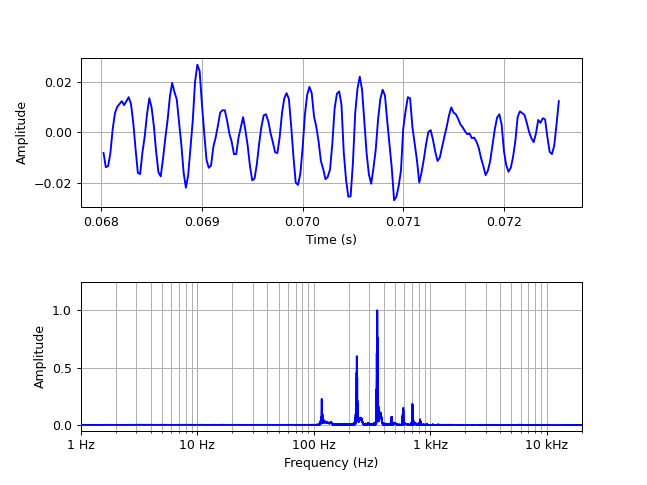

In [57]:
S_side = abs(S_side)/max(S_side)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.5)

#figura 1, ax1
ax1.plot(t[3000:3200], s[3000:3200], "b") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()


#figura 2, ax2
ax2.plot(freqs_side, abs(S_side), "b") # plotting the positive fft spectrum
ax2.set_xscale('log')
ax2.axis([1, 20000, -0.05, 1.25])
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.grid(True, which="both", ls="-")



# hay dos formas en este caso para dejar con numeros enteros

# Se define para valores en Hz inmediatamente con este formato predefinido
ax2.xaxis.set_major_formatter(EngFormatter(unit='Hz')) 


In [58]:
chunk                  = 1024
formato                = pyaudio.paInt16
canales                = 1
tasa_sampleo           = 44100
segundos_grabados      = 5
nombre_archivo_salida  = "puretone.wav"

p = pyaudio.PyAudio()

stream = p.open(format=formato,
                channels=canales,
                rate=tasa_sampleo,
                input=True,
                frames_per_buffer=chunk)

print("* grabando")

frames = []

for i in range(0, int(tasa_sampleo / chunk * segundos_grabados)):
    data = stream.read(chunk)
    frames.append(data)

print("* lista la grabación")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(nombre_archivo_salida, 'wb')
wf.setnchannels(canales)
wf.setsampwidth(p.get_sample_size(formato))
wf.setframerate(tasa_sampleo)
wf.writeframes(b''.join(frames))
wf.close()

* grabando
* lista la grabación


In [59]:
pt_filename = 'puretone.wav'
fs_rate, pt = wavfile.read(pt_filename)
print ("Frequency sampling", fs_rate)

pt = pt/max(pt)
l_audio = len(pt.shape)
print ("Channels", l_audio)
if l_audio == 2:
    pt = pt.sum(axis=1) / 2

tpt, freqspt, freqs_sidept, PT, PT_mag, PT_side = TF2(pt, fs_rate)

Frequency sampling 44100
Channels 1
N is  220160
Ni is 110080


<IPython.core.display.Javascript object>


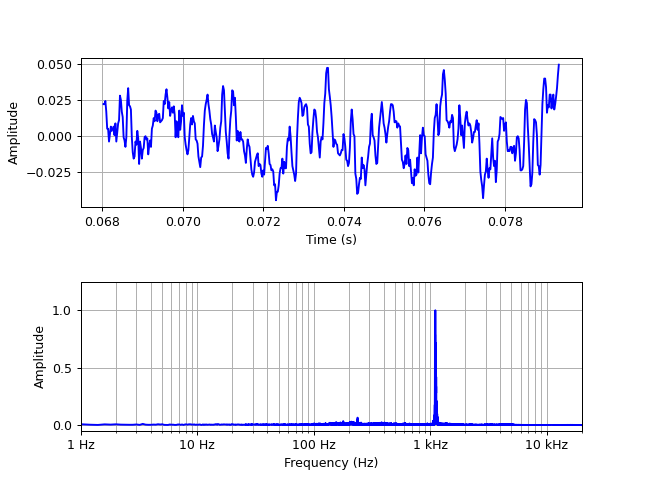

In [61]:
PT_side = abs(PT_side)/max(PT_side)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.5)

#figura 1, ax1
ax1.plot(tpt[3000:3500], pt[3000:3500], "b") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()


#figura 2, ax2
ax2.plot(freqs_sidept, abs(PT_side), "b") # plotting the positive fft spectrum
ax2.set_xscale('log')
ax2.axis([1, 20000, -0.05, 1.25])
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.grid(True, which="both", ls="-")



# hay dos formas en este caso para dejar con numeros enteros

# Se define para valores en Hz inmediatamente con este formato predefinido
ax2.xaxis.set_major_formatter(EngFormatter(unit='Hz')) 


In [62]:
s_filename = 'Lore_mary_had.wav'
h_filename = 'catedral_valdivia.wav'

fs , s = scipy.io.wavfile.read(s_filename)
fs , h = scipy.io.wavfile.read(h_filename)

s = s/max(s)
h = h/max(h)

s_duration = len(s)/fs
s_time = np.arange(0,s_duration,1/fs) #time vector

h_duration = len(h)/fs
h_time = np.arange(0,h_duration,1/fs) #time vector

yc = convolve(s, h, mode='full')

yc_duration = len(yc)/fs
yc_time = np.arange(0,yc_duration,1/fs) #time vector

In [63]:
ipd.Audio(yc, rate = fs_rate)

<IPython.core.display.Javascript object>


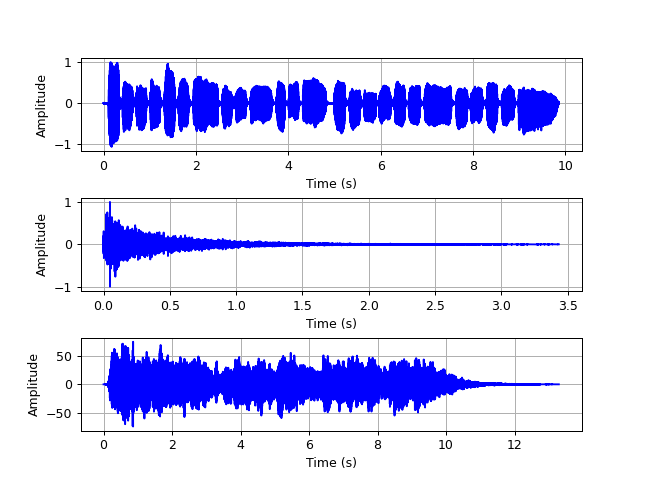

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.5)

#figura 1, ax1
ax1.plot(s_time, s, "b") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()

#figura 2, ax2
ax2.plot(h_time, h, "b") # plotting the positive fft spectrum
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.grid()

#figura 3, ax3
ax3.plot(yc_time, yc, "b") # plotting the positive fft spectrum
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude')
ax3.grid()

In [65]:
ts, freqss, freqs_sides, S, S_mag, S_side = TF2(s, fs_rate)
th, freqsh, freqs_sideh, H, H_mag, H_side = TF2(h, fs_rate)
tyc, freqsyc, freqs_sideyc, Yc, Yc_mag, Yc_side = TF2(yc, fs_rate)

N is  434834
Ni is 217417
N is  151416
Ni is 75708
N is  586249
Ni is 293124


<IPython.core.display.Javascript object>


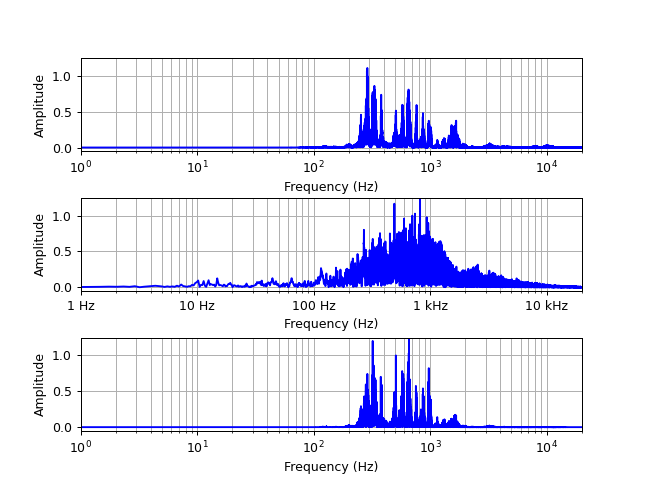

In [66]:
S_side = abs(S_side)/max(S_side)
H_side = abs(H_side)/max(H_side)
Yc_side = abs(Yc_side)/max(Yc_side)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.5)

#figura 1, ax1
ax1.plot(freqs_sides, abs(S_side), "b") # plotting the positive fft spectrum
ax1.set_xscale('log')
ax1.axis([1, 20000, -0.05, 1.25])
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude')
ax1.grid(True, which="both", ls="-")

#figura 2, ax2
ax2.plot(freqs_sideh, abs(H_side), "b") # plotting the positive fft spectrum
ax2.set_xscale('log')
ax2.axis([1, 20000, -0.05, 1.25])
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.grid(True, which="both", ls="-")

#figura 3, ax3
ax3.plot(freqs_sideyc, abs(Yc_side), "b") # plotting the positive fft spectrum
ax3.set_xscale('log')
ax3.axis([1, 20000, -0.05, 1.25])
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Amplitude')
ax3.grid(True, which="both", ls="-")

# hay dos formas en este caso para dejar con numeros enteros

# Se define para valores en Hz inmediatamente con este formato predefinido
ax2.xaxis.set_major_formatter(EngFormatter(unit='Hz')) 


In [67]:
a=[H, S]
max_len = max([len(x) for x in a])
max_len

434834

In [68]:
output = [np.pad(x, (0, max_len - len(x)), 'constant') for x in a]
H = output[0]
S = output[1]
print(len(H))
print(len(S))

434834
434834


In [69]:
Y = H*S
y = ifft(Y)
y_real= y.real/max(y.real)
print(y_real)
ipd.Audio(y_real, rate = fs_rate)

[0.1933551  0.19360857 0.19351649 ... 0.18835868 0.19082364 0.19098923]


In [70]:
y_real = y_real/max(y_real)

y_real_duration = len(y_real)/fs
y_real_time = np.arange(0,y_real_duration,1/fs) #time vector

In [71]:
ty_real, freqsy_real, freqs_sidey_real, Yreal, Yreal_mag, Yreal_side = TF2(y_real, fs_rate)

N is  434834
Ni is 217417


<IPython.core.display.Javascript object>


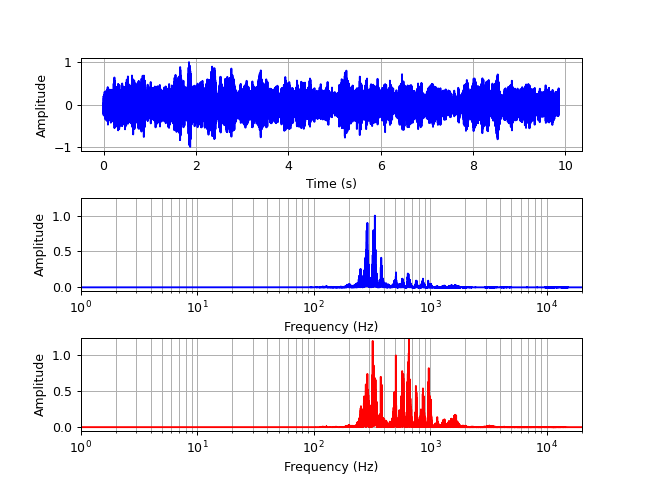

In [72]:
Yreal_side = abs(Yreal_side)/max(Yreal_side)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.5)

#figura 1, ax1
ax1.plot(y_real_time, y_real, "b") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()

#figura 2, ax2
ax2.plot(freqs_sidey_real, abs(Yreal_side), "b") # plotting the positive fft spectrum
ax2.set_xscale('log')
ax2.axis([1, 20000, -0.05, 1.25])
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.grid(True, which="both", ls="-")

#figura 3, ax3
ax3.plot(freqs_sideyc, abs(Yc_side), "r") # plotting the positive fft spectrum
ax3.set_xscale('log')
ax3.axis([1, 20000, -0.05, 1.25])
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Amplitude')
ax3.grid(True, which="both", ls="-")
